<a href="https://colab.research.google.com/github/JoelForson/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Lab%205/Monte_Carlo_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
np.random.randint(9999,99999)

83597

85962

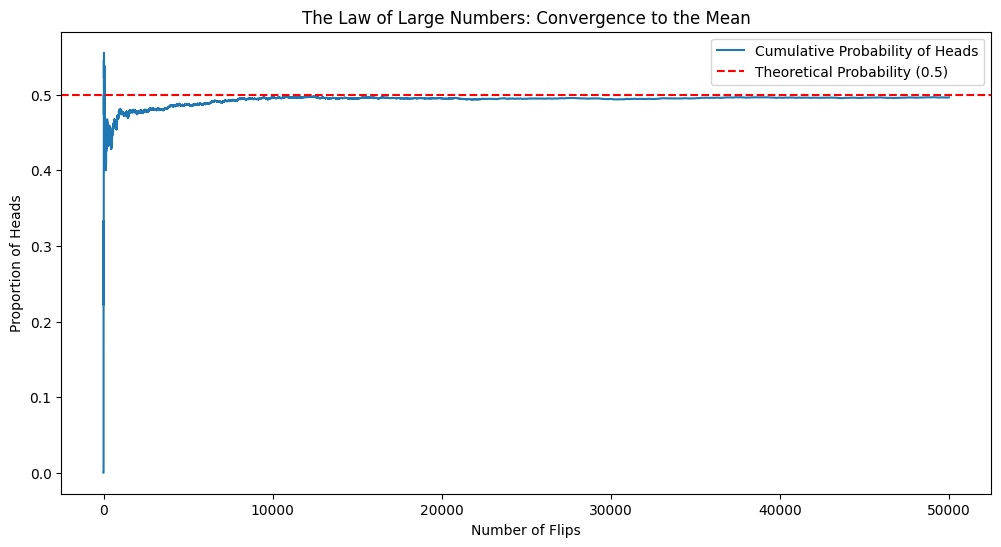

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(50000)

In [21]:
def monty_hall_sim(n_games):
  switch_wins = 0
  stay_wins = 0

  for _ in range(n_games):
    doors = [0,1,2]
    prize = np.random.choice(doors)
    choice = np.random.choice(doors)

    #host opens door
    #host cannot open prize and cannot open choice
    opennable_doors = [d for d in doors if d != prize and d != choice]
    host_opens = np.random.choice(opennable_doors)

    # Strategy: Stay
    if choice == prize:
        stay_wins += 1

    # Strategy: Switch
    # The switch choice is the door that is not 'choice' and not 'host_opens'
    switch_choice = [d for d in doors if d != choice and d != host_opens]
    if switch_choice[0] == prize:
        switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Streaming output truncated to the last 5000 lines.
Win Rate (Stay): 24.45%
Win Rate (Switch): 50.56%
Win Rate (Stay): 24.45%
Win Rate (Switch): 50.57%
Win Rate (Stay): 24.45%
Win Rate (Switch): 50.58%
Win Rate (Stay): 24.45%
Win Rate (Switch): 50.59%
Win Rate (Stay): 24.45%
Win Rate (Switch): 50.60%
Win Rate (Stay): 24.46%
Win Rate (Switch): 50.60%
Win Rate (Stay): 24.47%
Win Rate (Switch): 50.60%
Win Rate (Stay): 24.47%
Win Rate (Switch): 50.61%
Win Rate (Stay): 24.48%
Win Rate (Switch): 50.61%
Win Rate (Stay): 24.48%
Win Rate (Switch): 50.62%
Win Rate (Stay): 24.49%
Win Rate (Switch): 50.62%
Win Rate (Stay): 24.50%
Win Rate (Switch): 50.62%
Win Rate (Stay): 24.50%
Win Rate (Switch): 50.63%
Win Rate (Stay): 24.50%
Win Rate (Switch): 50.64%
Win Rate (Stay): 24.51%
Win Rate (Switch): 50.64%
Win Rate (Stay): 24.51%
Win Rate (Switch): 50.65%
Win Rate (Stay): 24.51%
Win Rate (Switch): 50.66%
Win Rate (Stay): 24.51%
Win Rate (Switch): 50.67%
Win Rate (Stay): 24.51%
Win Rate (Switch): 50.68%

Probability of Revenue Decline: 17.60%
95% Value at Risk (Worst Case): $9,596,895.62


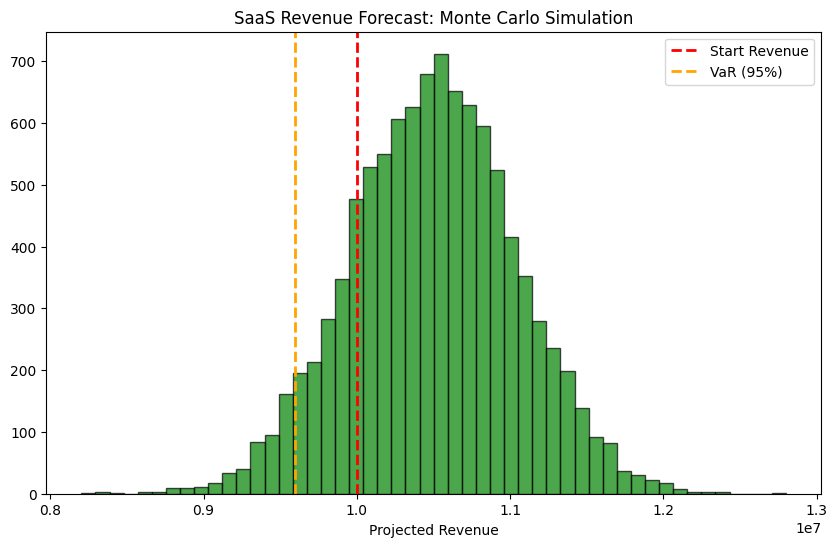

In [22]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

Probability of Revenue Decline: 100.00%
95% Value at Risk (Worst Case): $8,671,703.99


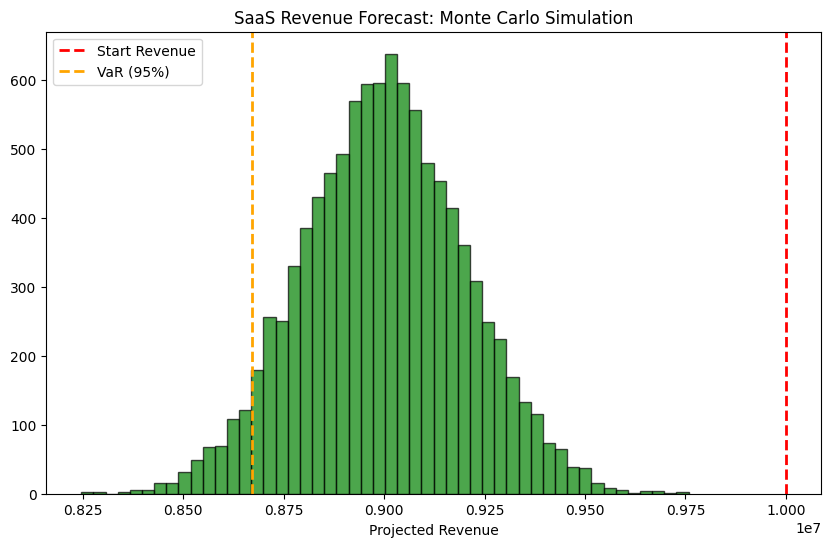

In [25]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.standard_t(df=3, size=n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)